<a href="https://colab.research.google.com/github/revati2013/Assignment07_Clustering/blob/main/Assign07_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [ ]:
data=pd.read_csv('crime_data.csv')

In [ ]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


#Hierarchical Clustring

In [ ]:
#Normalized data fuction
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [ ]:
df_norm=norm_func(data.iloc[:,1:])

In [ ]:
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


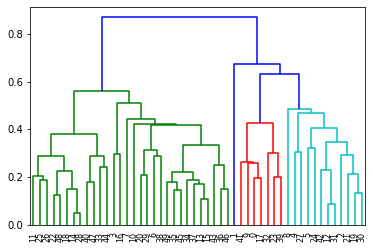

In [ ]:
dendogram=sch.dendrogram(sch.linkage(df_norm,method='average'))

In [ ]:
# create clusters
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [ ]:
y_hc=hc.fit_predict(df_norm)

In [ ]:
y_hc

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 1, 1])

In [ ]:
data['h_clusterid']=hc.labels_

In [ ]:
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


#K-Means

In [ ]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_crim_df = scaler.fit_transform(data.iloc[:,1:])

In [ ]:
scaled_crim_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116, -1.06904497],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392, -1.06904497],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626, -1.06904497],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398,  0.26726124],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393, -1.06904497],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137, -1.06904497],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319,  0.26726124],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422,  0.26726124],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 , -1.06904497],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293, -1.06904497],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987,  0.26726124],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217,  1.60356745],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525, -1.06904497],
       [-0.13637203, -0.70012057, -0.0

In [ ]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

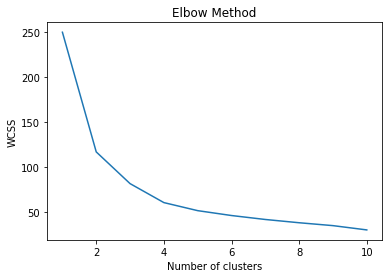

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_crim_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_crim_df)

KMeans(n_clusters=4, random_state=42)

In [ ]:
clusters_new.labels_

array([1, 2, 2, 0, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 0, 1, 3, 2, 0, 2,
       0, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 0, 0], dtype=int32)

In [ ]:
#Assign clusters to the data set
data['clusterid_new'] = clusters_new.labels_

In [ ]:
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new
0,Alabama,13.2,236,58,21.2,0,1
1,Alaska,10.0,263,48,44.5,0,2
2,Arizona,8.1,294,80,31.0,0,2
3,Arkansas,8.8,190,50,19.5,1,0
4,California,9.0,276,91,40.6,0,2
5,Colorado,7.9,204,78,38.7,0,2
6,Connecticut,3.3,110,77,11.1,1,0
7,Delaware,5.9,238,72,15.8,1,0
8,Florida,15.4,335,80,31.9,0,2
9,Georgia,17.4,211,60,25.8,0,1


In [ ]:
data[data['clusterid_new']==3]


,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new
11,Idaho,2.6,120,54,14.2,2,3
14,Iowa,2.2,56,57,11.3,2,3
18,Maine,2.1,83,51,7.8,2,3
25,Montana,6.0,109,53,16.4,2,3
26,Nebraska,4.3,102,62,16.5,2,3
28,New Hampshire,2.1,57,56,9.5,2,3
33,North Dakota,0.8,45,44,7.3,2,3
40,South Dakota,3.8,86,45,12.8,2,3
44,Vermont,2.2,48,32,11.2,2,3
47,West Virginia,5.7,81,39,9.3,2,3


In [ ]:
data[data['clusterid_new']==0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new
3,Arkansas,8.8,190,50,19.5,1,0
6,Connecticut,3.3,110,77,11.1,1,0
7,Delaware,5.9,238,72,15.8,1,0
10,Hawaii,5.3,46,83,20.2,1,0
13,Indiana,7.2,113,65,21.0,1,0
15,Kansas,6.0,115,66,18.0,1,0
16,Kentucky,9.7,109,52,16.3,1,0
20,Massachusetts,4.4,149,85,16.3,1,0
22,Minnesota,2.7,72,66,14.9,1,0
29,New Jersey,7.4,159,89,18.8,1,0


#DBSCAN

In [ ]:
dbscan = DBSCAN(eps=1, min_samples=7)
dbscan.fit(scaled_crim_df)

DBSCAN(eps=1, min_samples=7)

In [ ]:
#Noisy samples are given the label -1.
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  1,  0,  1, -1,
       -1,  0, -1, -1, -1,  1, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1, -1,
        1,  1, -1,  1, -1, -1,  0, -1, -1, -1, -1,  1,  1,  0, -1,  1])

In [ ]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [ ]:
cl

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [ ]:
clustered = pd.concat([data,cl],axis=1)
clustered

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new,cluster
0,Alabama,13.2,236,58,21.2,0,1,-1
1,Alaska,10.0,263,48,44.5,0,2,-1
2,Arizona,8.1,294,80,31.0,0,2,-1
3,Arkansas,8.8,190,50,19.5,1,0,-1
4,California,9.0,276,91,40.6,0,2,-1
5,Colorado,7.9,204,78,38.7,0,2,-1
6,Connecticut,3.3,110,77,11.1,1,0,-1
7,Delaware,5.9,238,72,15.8,1,0,-1
8,Florida,15.4,335,80,31.9,0,2,-1
9,Georgia,17.4,211,60,25.8,0,1,-1


In [ ]:
clustered[clustered['cluster']==-1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new,cluster
0,Alabama,13.2,236,58,21.2,0,1,-1
1,Alaska,10.0,263,48,44.5,0,2,-1
2,Arizona,8.1,294,80,31.0,0,2,-1
3,Arkansas,8.8,190,50,19.5,1,0,-1
4,California,9.0,276,91,40.6,0,2,-1
5,Colorado,7.9,204,78,38.7,0,2,-1
6,Connecticut,3.3,110,77,11.1,1,0,-1
7,Delaware,5.9,238,72,15.8,1,0,-1
8,Florida,15.4,335,80,31.9,0,2,-1
9,Georgia,17.4,211,60,25.8,0,1,-1


In [ ]:
clustered.groupby('cluster').agg(['mean']).reset_index()

,cluster,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new
,,mean,mean,mean,mean,mean,mean
0,-1,9.248485,203.181818,68.242424,23.972727,0.454545,1.181818
1,0,3.600000,86.750000,52.125000,12.225000,2.000000,3.000000
2,1,6.155556,126.555556,67.555556,19.188889,1.000000,0.000000


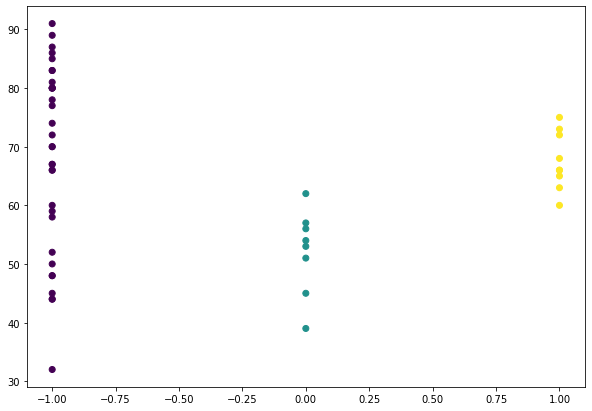

In [ ]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(clustered['cluster'],clustered['UrbanPop'], c=dbscan.labels_) 